In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator
from scipy import stats
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

import pandas as pd
test = pd.read_csv('NB15_testing-set.csv')
train = pd.read_csv('NB15_training-set.csv')
feature_desc = pd.read_csv('NB15_features.csv', encoding='cp1252')

print(train.columns.tolist())

train

['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [43]:
train.shape
test.shape

(82332, 45)

C:\Users\zalak\AppData\Local\Temp\ipykernel_29704\1163144708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_29704\1163144708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_29704\1163144708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy o

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21')]

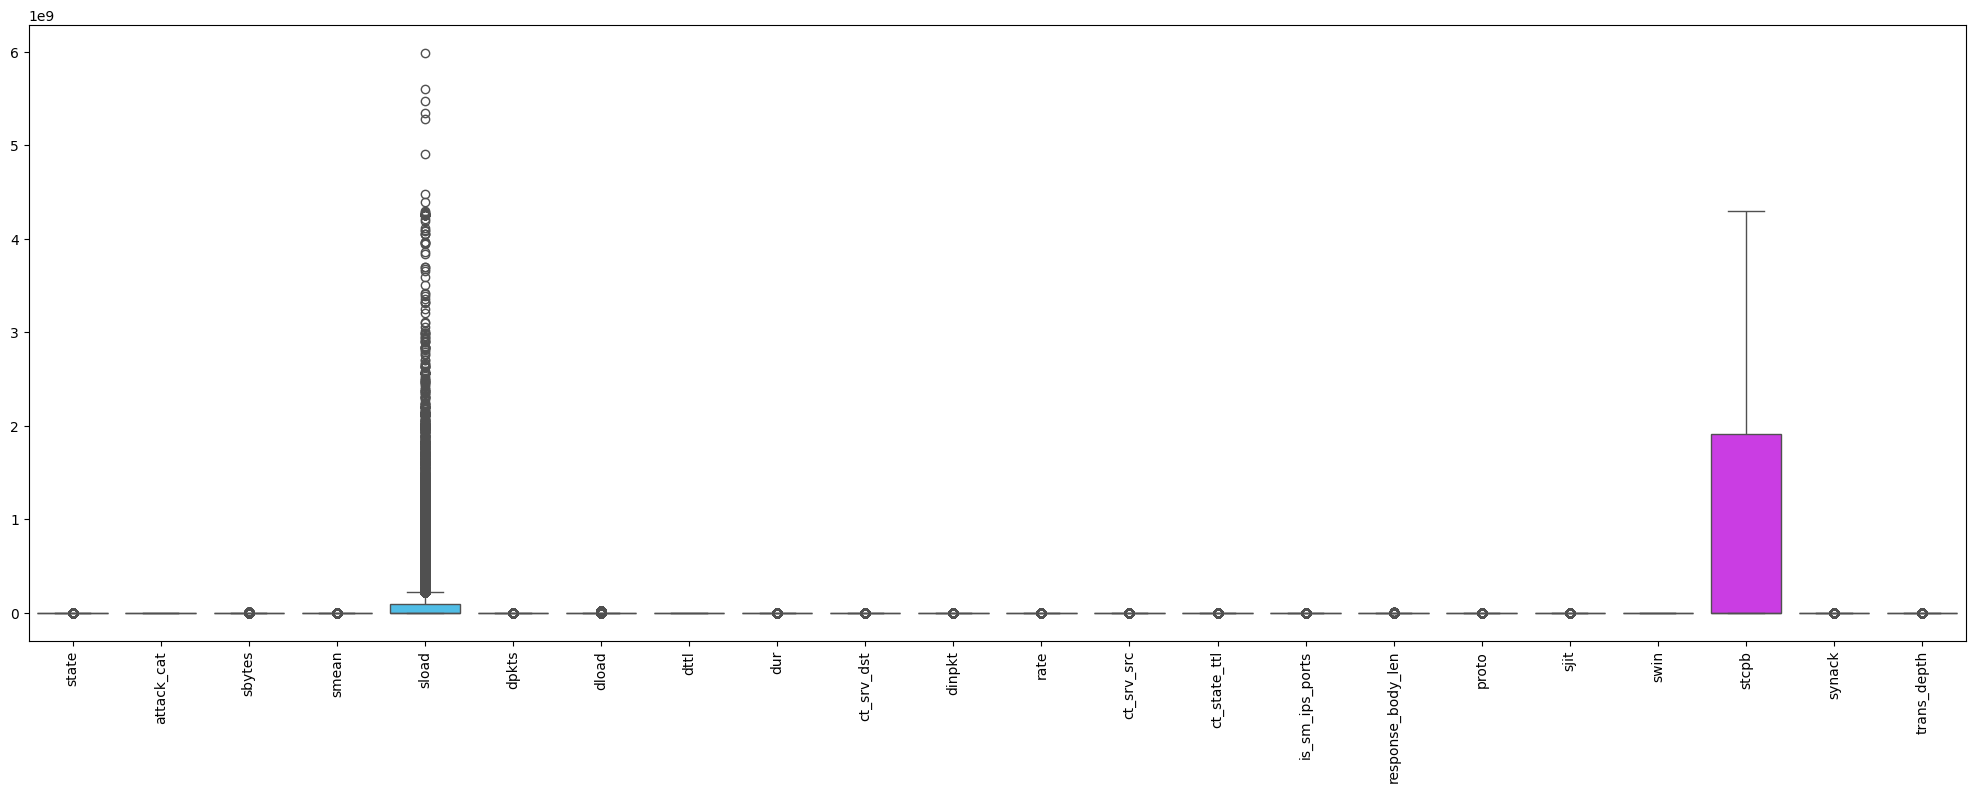

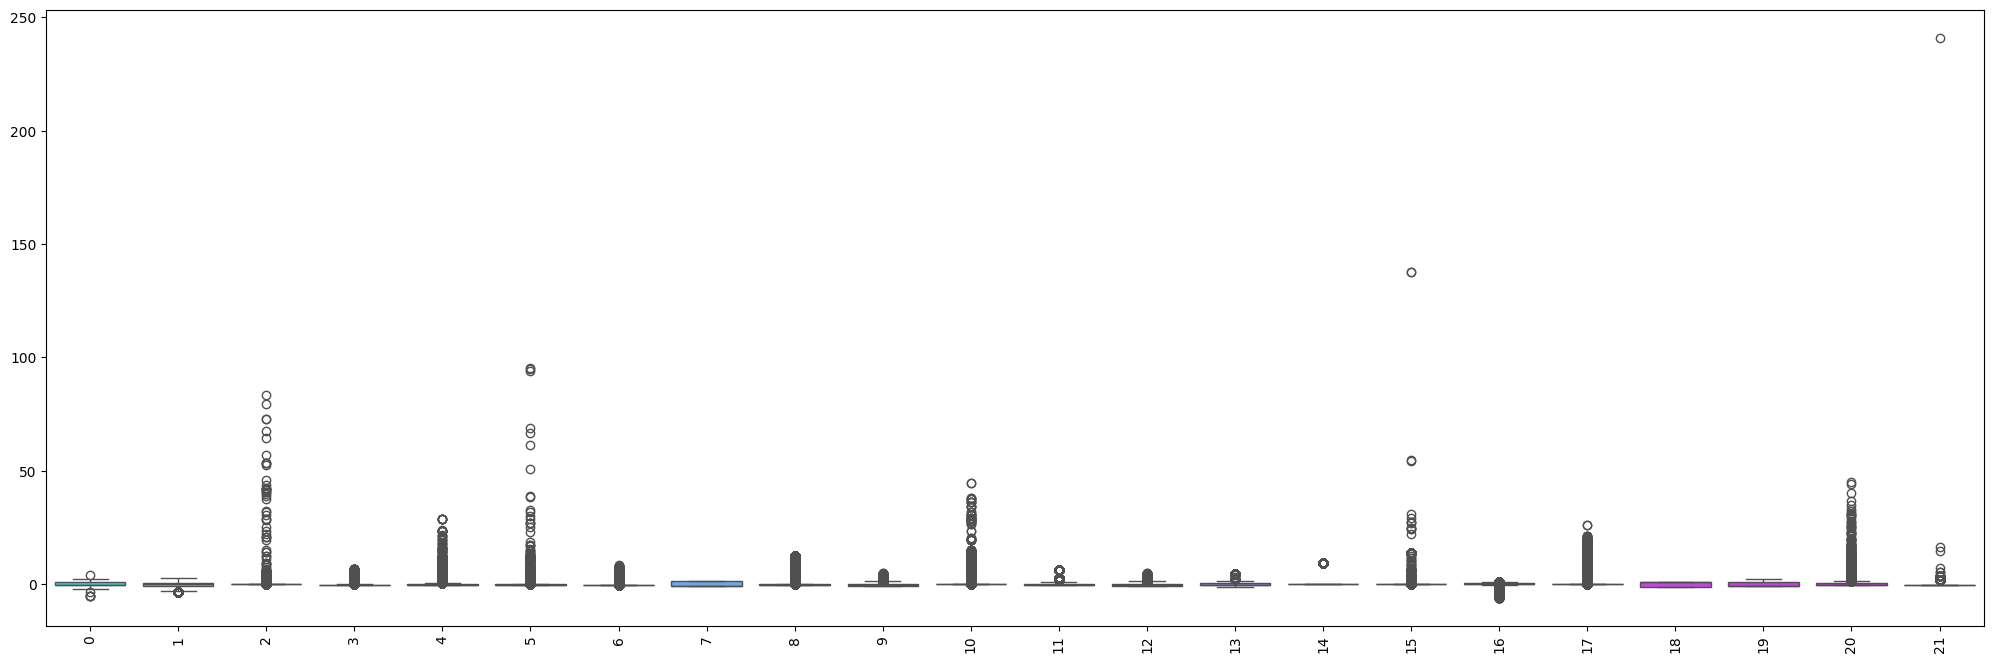

In [38]:
features = ['state', 'attack_cat', 'sbytes', 'smean','sload', 'dpkts', 'dload', 'dttl', 'dur',
            'ct_srv_dst', 'dinpkt', 'rate', 'ct_srv_src', 'ct_state_ttl', 'is_sm_ips_ports',
            'response_body_len', 'proto', 'sjit', 'swin', 'stcpb', 'synack', 'trans_depth']

#train_encoded = pd.DataFrame(train.drop(features, axis = 1).values)
train_encoded = train[features]
test_encoded = test[features]

label_encoders = {}
for column in train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
    label_encoders[column] = le

for column in test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
    label_encoders[column] = le

train_scaler = StandardScaler()
clean_train = pd.DataFrame(train_scaler.fit_transform(train_encoded))

test_scaler = StandardScaler()
clean_test = pd.DataFrame(test_scaler.fit_transform(test_encoded))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=train_encoded)
u.set_xticklabels(u.get_xticklabels(),rotation=90)

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=clean_test)
u.set_xticklabels(u.get_xticklabels(),rotation=90)


C:\Users\zalak\AppData\Local\Temp\ipykernel_29704\411510202.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  u.set_xticklabels(u.get_xticklabels(),rotation=90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21')]

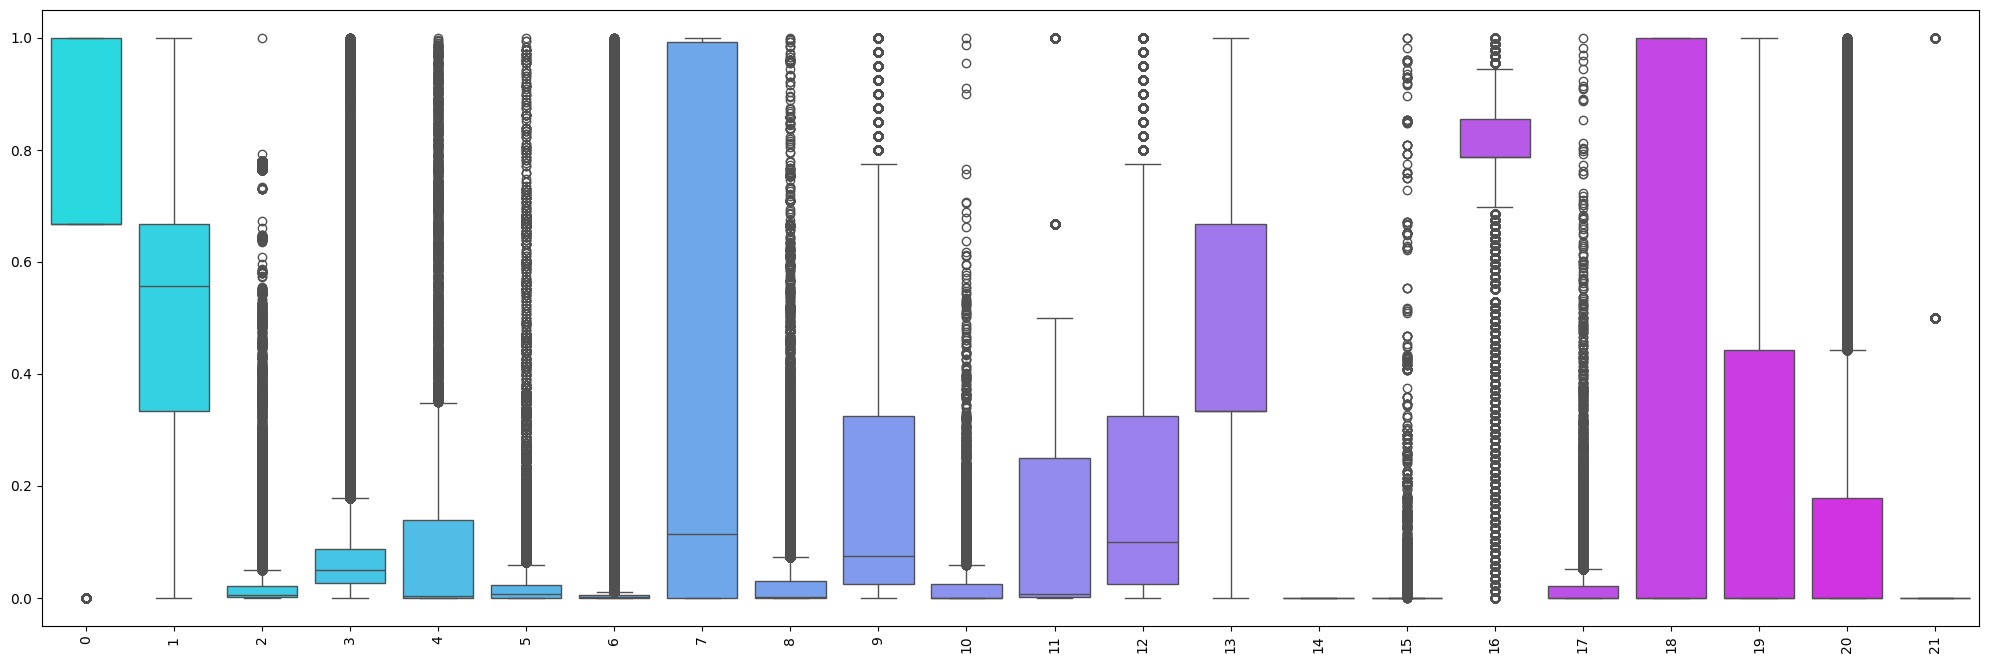

In [39]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(train_encoded))

X_train_df = clean_train
X_test_df =  clean_test

y_train = train[['label']]
y_test = test[['label']]

# Apply Z-score filter on X_train
z_scores_train = np.abs(stats.zscore(X_train_df))
train_mask = (z_scores_train < 3).all(axis=1)
X_train_filtered = X_train_df[train_mask]
y_train_filtered = y_train[train_mask]  # no .iloc or .values

# Apply Z-score filter on X_test
z_scores_test = np.abs(stats.zscore(X_test_df))
test_mask = (z_scores_test < 3).all(axis=1)
X_test_filtered = X_test_df[test_mask]
y_test_filtered =  y_test[test_mask]  # no .iloc or .values


#Aggressively scale standardise data for fairness
ro_scaler = RobustScaler()
scaler = MinMaxScaler()

X_train_filtered = ro_scaler.fit_transform(X_train_filtered)
X_test_filtered = ro_scaler.fit_transform(X_test_filtered)

X_train_filtered = pd.DataFrame(scaler.fit_transform(X_train_filtered))
X_test_filtered = pd.DataFrame(scaler.fit_transform(X_test_filtered))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=X_train_filtered)
u.set_xticklabels(u.get_xticklabels(),rotation=90)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split your final data again if needed
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2, random_state=42
)

# Define the model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),                    # Input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Use softmax with units=num_classes for multi-class
])

# Compile the model
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',    # use 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9392 - loss: 0.1488 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 2/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9952 - loss: 0.0133 - val_accuracy: 0.9999 - val_loss: 4.3667e-04
Epoch 3/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9999 - val_loss: 5.2322e-04
Epoch 4/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 1.0879e-04
Epoch 5/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 2.0584e-04
Epoch 6/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9999 - val_loss: 1.8479e-04
Epoch 7/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 9.6553e-05
Epoch 8/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accur

2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9991 - loss: 0.0032
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9991 - loss: 0.0032
Train Accuracy: 0.9984
Val Accuracy:   0.9984


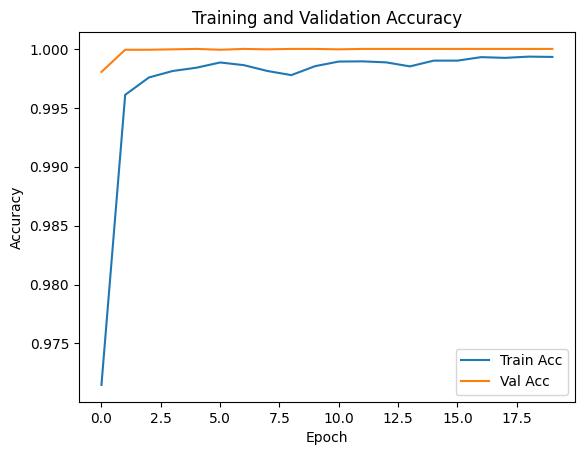

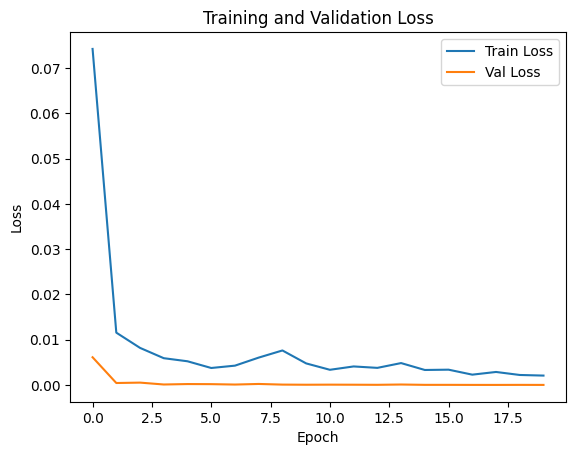

In [44]:
train_loss, train_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)
val_loss, val_acc = mlp_model.evaluate(X_test_filtered, y_test_filtered, verbose=1)

val_losses = []
train_losses = []

train_losses.append(train_loss)
val_losses.append(val_loss)


print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")

# Plot learning curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss curves over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [ ]:
def predict_access_vector(model : BaseEstimator, input_dict : dict, label_encoders : dict):
    
    encoded_input = encode_user_input(input_dict, label_encoders)
    encoded_input_df = pd.DataFrame([encoded_input])
    prediction = model.predict(encoded_input_df)
    
    return prediction

def encode_user_input(input_dict: dict, label_encoders: dict) -> dict:
    encoded = {}
    for key, value in input_dict.items():
        if key in label_encoders:
            try:
                encoded[key] = label_encoders[key].transform([value])[0]
            except ValueError:
                raise ValueError(f"Value '{value}' for feature '{key}' was not seen during training.")
        else:
            encoded[key] = value  # leave numeric features as is
    return encoded


def print_prediction(prediction: str, user_input: dict):
    print("=== Input Features ===")
    for feature_name, feature_series in user_input.items():
        # Extract scalar value from Series
        value = feature_series.iloc[0] if hasattr(feature_series, 'iloc') else feature_series
        print(f"{feature_name:<25}: {value}")
    
    print("\n=== Predicted Impact ===")
    if prediction[0][0] == 1:
        print("Irregular activity, possible cyber breach!")
    else:
        print("No sign of unusual activity")

In [46]:
user_input = {
    'state': 'FIN',
    'attack_cat': 'Fuzzers',
    'sbytes': 100,
    'smean': 50,
    'sload': 1200,
    'dpkts': 3,
    'dload': 800,
    'dttl': 64,
    'dur': 10,
    'ct_srv_dst': 2,
    'dinpkt': 0.5,
    'rate': 0.2,
    'ct_srv_src': 3,
    'ct_state_ttl': 5,
    'is_sm_ips_ports': 1,
    'response_body_len': 0,
    'proto': 'tcp',
    'sjit': 0.0,
    'swin': 255,
    'stcpb': 12345678,
    'synack': 1,
    'trans_depth': 100.8
}

prediction = predict_access_vector(mlp_model, user_input, label_encoders)
print_prediction(prediction, user_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
=== Input Features ===
state                    : FIN
attack_cat               : Fuzzers
sbytes                   : 100
smean                    : 50
sload                    : 1200
dpkts                    : 3
dload                    : 800
dttl                     : 64
dur                      : 10
ct_srv_dst               : 2
dinpkt                   : 0.5
rate                     : 0.2
ct_srv_src               : 3
ct_state_ttl             : 5
is_sm_ips_ports          : 1
response_body_len        : 0
proto                    : tcp
sjit                     : 0.0
swin                     : 255
stcpb                    : 12345678
synack                   : 1
trans_depth              : 100.8

=== Predicted Impact ===
Irregular activity, possible cyber breach!
